# Evaluation pour le poste Inria / AP-PH - Partie 2

### Dans ce notebook, nous allons faire une analyse exploiratoire des données, la visualisation des données en faisant la jointure des deux tables du jeu de données. 

#### Les librairies importantes

In [1]:
from matplotlib import pyplot
import plotly
import plotly.offline as py
#from plotly import graph_objs as go
import plotly.graph_objects as go

##### Le jeu de données 

In [2]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

##### Le nettoyage du jeu de données, en nous inspirant de la partie 1, le recodage du statut du test

In [3]:
df_patient.dropna(axis = 0, inplace = True)
df_pcr['pcr'].replace(['P'], 'Positive', inplace=True)
df_pcr['pcr'].replace(['N'], 'Negative', inplace=True)

### La fonction detect_duplicates qui permet de supprimer les doublons du dataframe df_patient

In [4]:
def detect_duplicates(df_patient):
    df_patient1 = df_patient.dropna()
    df_patient1 = df_patient1.drop_duplicates("patient_id",keep = "last")
    df_patient1 = df_patient1.drop_duplicates("phone_number", keep = "last")
    df_patient1[df_patient1.street_number >999]
    df_patient1 = df_patient1.reset_index(level=None, drop=True, inplace=False,col_level=0, col_fill='')
    return df_patient1

## 1 - La jointure des tables

In [5]:
### On utilise le dataframe après suppression des doublons dans la table patient
df_patient1 = detect_duplicates(df_patient)

In [6]:
df_patient1.shape

(4054, 12)

In [7]:
print(df_patient1.isnull().sum(axis = 0))

patient_id       0
given_name       0
surname          0
street_number    0
address_1        0
suburb           0
postcode         0
state            0
date_of_birth    0
age              0
phone_number     0
address_2        0
dtype: int64


###### On constate, qu'il n'y a pas de donnéees manquantes

In [8]:
df_patient1.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill
3,421879,callum,nicolle,2.0,mcleod place,walgett,2144,nsw,19340319.0,25.0,03 79802023,marella
4,165725,macormack,maniotto,166.0,cossington smith crescent,ellenbrook,2075,nsw,19421204.0,29.0,07 88947739,golden ponds resort


#### Nous allons faire la jointure des deux tables en utilisant comme clé primaire l'identifiant des patients

In [9]:
### La jointure des deux tables
data_comb = pd.merge(df_patient1, df_pcr, on = 'patient_id')

In [10]:
data_comb

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown,Negative
1,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill,Positive
2,517113,trey,glass,27.0,mugga way,carnegie,5093,nsw,19180715.0,21.0,08 08091408,blackridge flyfishing school,Negative
3,996942,zachary,piazza,772.0,beaney street,manunda,2223,sa,19750703.0,25.0,02 36108470,rsd frareen,Negative
4,323165,taylor,binns,2.0,dunbar street,mount annan,4455,wa,19000509.0,11.0,08 99185004,sec 528,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,444199,matthew,roebuck,44.0,fuhrman street,tea tree gully,6112,wa,19421123.0,36.0,03 12751519,greenbank,Negative
1792,124956,marleigh,seen,11.0,crisp circuit,lavington,2640,sa,19640108.0,27.0,04 65522089,stoneyhurst,Negative
1793,513727,kane,costigan,1.0,stonehaven crescent,shenton park,2203,nsw,19100707.0,22.0,04 55808760,townview,Negative
1794,230775,victoria,whiteley,12.0,beasley street,landsborough,2388,nsw,19491217.0,30.0,03 68108604,ponderosa,Positive


## 2 - Visualisation des données 

#### Le nombre de test effectué 

In [11]:
all_pcr_count=data_comb['pcr'].value_counts().to_frame().reset_index().rename(columns={'index':'PCR','pcr':'count'})

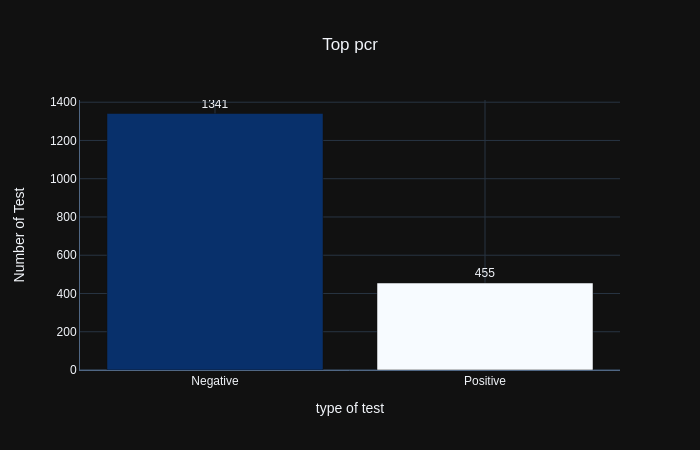

In [12]:
fig = go.Figure(go.Bar(
    x=all_pcr_count['PCR'][:10],y=all_pcr_count['count'][:10],
    marker={'color': all_pcr_count['count'][:10], 
    'colorscale': 'blues'},  
    text=all_pcr_count['count'][:10],
    textposition = "outside",
))
fig.update_layout(title_text='Top pcr',xaxis_title="type of test",
                  yaxis_title="Number of Test", template="plotly_dark", height=700,title_x=0.5)
fig.show(renderer="png")

### Le nombre de personnes testées par ville 

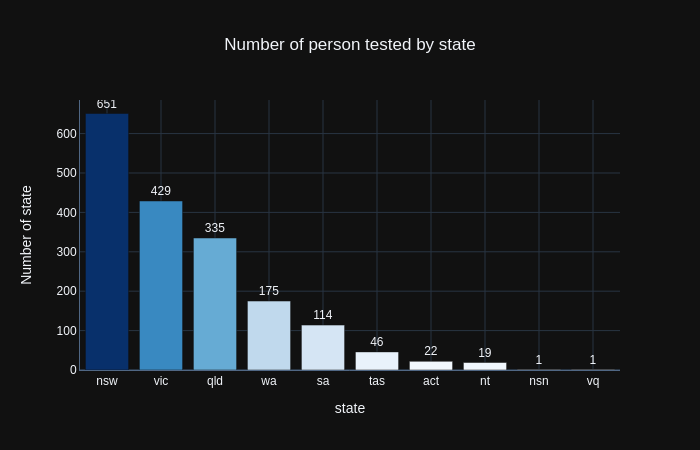

In [13]:
all_state_count=data_comb['state'].value_counts().to_frame().reset_index().rename(columns={'index':'STATE','state':'count'})

fig = go.Figure(go.Bar(
    x=all_state_count['STATE'][:10],y=all_state_count['count'][:10],
    marker={'color': all_state_count['count'][:10], 
    'colorscale': 'blues'},  
    text=all_state_count['count'][:10],
    textposition = "outside",
))
fig.update_layout(title_text='Number of person tested by state',xaxis_title="state",
                  yaxis_title="Number of state",template="plotly_dark",height=700,title_x=0.5)
fig.show(renderer="png")

### Le type des tests en fonction des états

In [14]:
data_comb_group = data_comb.groupby(['state','pcr'], as_index=False)['patient_id'].count()
df_positive = data_comb_group[data_comb_group['pcr']=='Positive'].groupby('state',as_index=False)['patient_id'].sum()
df_negative = data_comb_group[data_comb_group['pcr']=='Negative'].groupby('state',as_index=False)['patient_id'].sum()

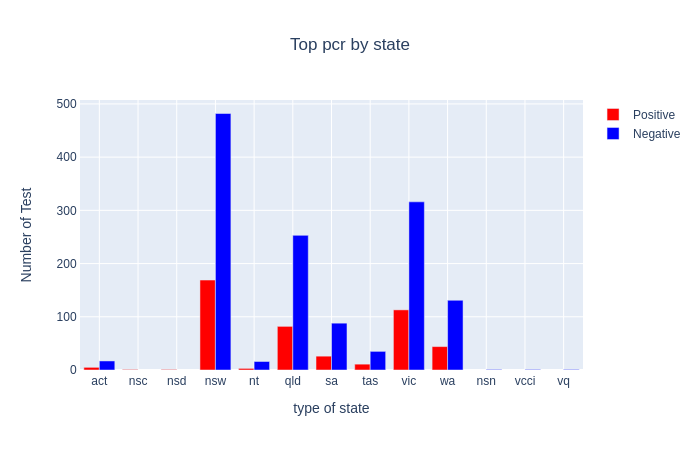

In [15]:
fig = go.Figure()

df_positive = data_comb_group[data_comb_group['pcr']=='Positive'].groupby('state',as_index=False)['patient_id'].sum()
df_negative = data_comb_group[data_comb_group['pcr']=='Negative'].groupby('state',as_index=False)['patient_id'].sum()
fig.add_trace(go.Bar(name='Positive', x=df_positive['state'], y=df_positive['patient_id'] ,marker_color='red'))
fig.add_trace(go.Bar(name='Negative', x=df_negative['state'], y=df_negative['patient_id'] ,marker_color='blue'))

fig.update_layout(title_text='Top pcr by state',xaxis_title="type of state",
                  yaxis_title="Number of Test", height=700,title_x=0.5)
fig.show(renderer="png")

On voit bien les villes les plus touchés par le covid 19 

### Les types tests par tranche d'age

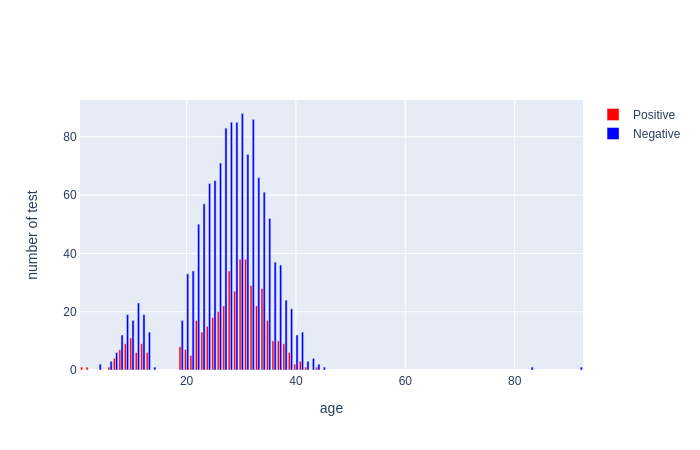

In [16]:
data_comb_group_1 = data_comb.groupby(['age','state','pcr'], as_index=False)['patient_id'].count()

fig = go.Figure()

df_positive_1 = data_comb_group_1[data_comb_group_1['pcr']=='Positive'].groupby('age',as_index=False)['patient_id'].sum()
df_negative_1 = data_comb_group_1[data_comb_group_1['pcr']=='Negative'].groupby('age',as_index=False)['patient_id'].sum()
fig.add_trace(go.Bar(name='Positive', x=df_positive_1['age'], y=df_positive_1['patient_id'], marker_color='red'))
fig.add_trace(go.Bar(name='Negative', x=df_negative_1['age'], y=df_negative_1['patient_id'], marker_color='blue'))

fig.update_layout(title_text='',xaxis_title="age",
                  yaxis_title="number of test", height=700,title_x=0.5)
fig.show(renderer="png")

#### On constate sur cette courbe que les gens de plus de 30 ans sont les plus contaminés et ont effectué beaucoup le test pcr